##Introduction
I found an interesting dataset on Kaggle titled "Car Sales Advertisements" which contains data for more than 9.5K cars sold in Ukraine. My goal is to fit a regression model that can accurately predict the the sale price of a vehicle, given the observations in this dataset. 

##Content
Dataset contains 9576 rows and 10 variables with essential meanings:

*   **car:** manufacturer brand
*   **price:** seller’s price in advertisement (in USD)
*   **body:** car body type
*   **mileage:** as mentioned in advertisement (‘000 Km)
*   **engV:** rounded engine volume (‘000 cubic cm)
*   **engType:** type of fuel (“Other” in this case should be treated as NA)
*   **registration:** whether car registered in Ukraine or not
*   **year:** year of production
*   **model:** specific model name
*   **drive:** drive type

A full overview of the data can be found here: https://www.kaggle.com/antfarol/car-sale-advertisements

##Method
I will setup, explore and prepare the data. Then I will move on to feature engineering/selection. Next, I will test and tune several models. Finally, I will use model comparasion techniques to choose the best model for this data.

In [ ]:
#Setting up the environment
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#setting up df
cars_df = pd.read_csv('https://raw.githubusercontent.com/JREnglish99/thinkful-data-science/main/challanges/data/car_ad.csv', encoding='latin-1')

In [ ]:
#exploring the data
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [ ]:
cars_df.head(15)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [ ]:
#further investigating the null values for engV and drive columns 

cars_df[cars_df['engV'].isnull()]

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
13,BMW,4700.000,sedan,200,NaN,Petrol,yes,1996,316,rear
30,Nissan,13980.000,hatch,31,NaN,Other,yes,2013,Leaf,front
31,Nissan,17300.000,hatch,24,NaN,Other,yes,2013,Leaf,front
37,Audi,2850.000,sedan,260,NaN,Other,no,1999,A6,NaN
...,...,...,...,...,...,...,...,...,...,...
9470,Chrysler,0.000,vagon,198,NaN,Petrol,yes,2001,PT Cruiser,front
9480,Renault,8100.000,van,135,NaN,Diesel,yes,2008,Kangoo ïàññ.,front
9515,Renault,5000.000,vagon,150,NaN,Other,yes,2006,Kangoo ïàññ.,front
9546,VAZ,907.725,sedan,1,NaN,Other,yes,1986,2106,rear


In [ ]:
cars_df[cars_df['drive'].isnull()]

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
37,Audi,2850.0,sedan,260,NaN,Other,no,1999,A6,NaN
44,BMW,39333.0,sedan,6,2.00,Petrol,yes,2016,520,NaN
52,Mercedes-Benz,31500.0,sedan,123,2.20,Diesel,yes,2011,E-Class,NaN
103,Volkswagen,10000.0,van,231,1.90,Diesel,yes,2005,T5 (Transporter) ïàññ.,NaN
...,...,...,...,...,...,...,...,...,...,...
9445,Nissan,5000.0,sedan,260,3.00,Gas,yes,2000,Maxima,NaN
9450,VAZ,750.0,sedan,123,1.20,Petrol,yes,1990,2105,NaN
9469,Renault,5650.0,hatch,175,99.99,Other,yes,2002,Laguna,NaN
9537,Volkswagen,11500.0,other,51,1.60,Petrol,yes,2013,Polo,NaN


In [ ]:
#dropping null values
cars_df = cars_df.dropna()

The data description mentions that engType contains values marked "other". I want to better understand how that value exisits within the data.

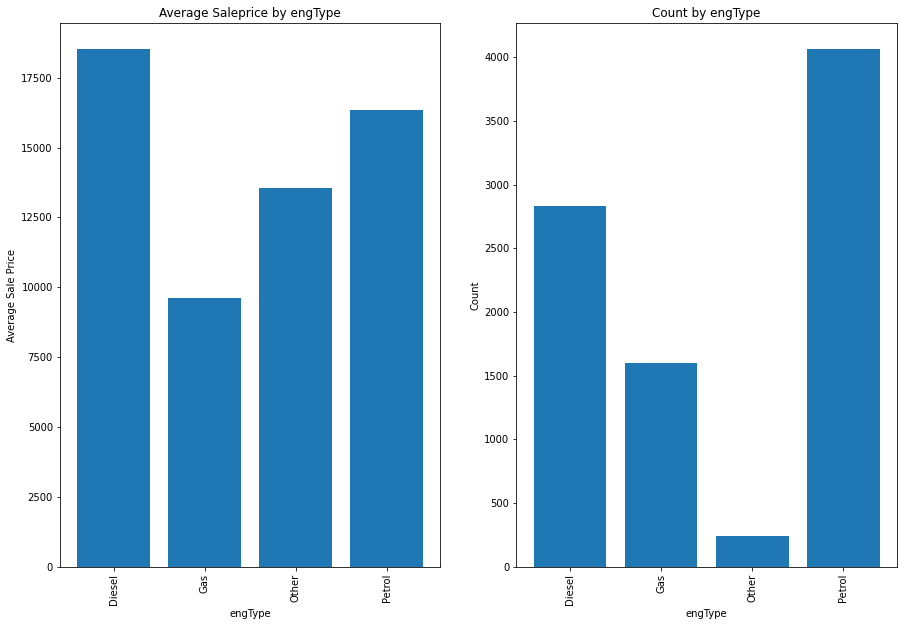

In [ ]:
#checking out engType 

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.bar(cars_df.groupby('engType')['price'].mean().index, cars_df.groupby('engType')['price'].mean())
plt.title('Average Saleprice by engType')
plt.ylabel('Average Sale Price')
plt.xlabel('engType')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.bar(cars_df.groupby('engType')['price'].count().index, cars_df.groupby('engType')['price'].count())
plt.title('Count by engType')
plt.ylabel('Count')
plt.xlabel('engType')
plt.xticks(rotation='vertical')
plt.show()

Compared to the other engTypes, the pricing seems avereage and there is not too many "other" values so it should be okay to drop.

In [ ]:
#This looks okay to drop rows where engine type is other
cars_df = cars_df[cars_df.engType != 'Other']

Now I will look for other outliers in the numeric data.

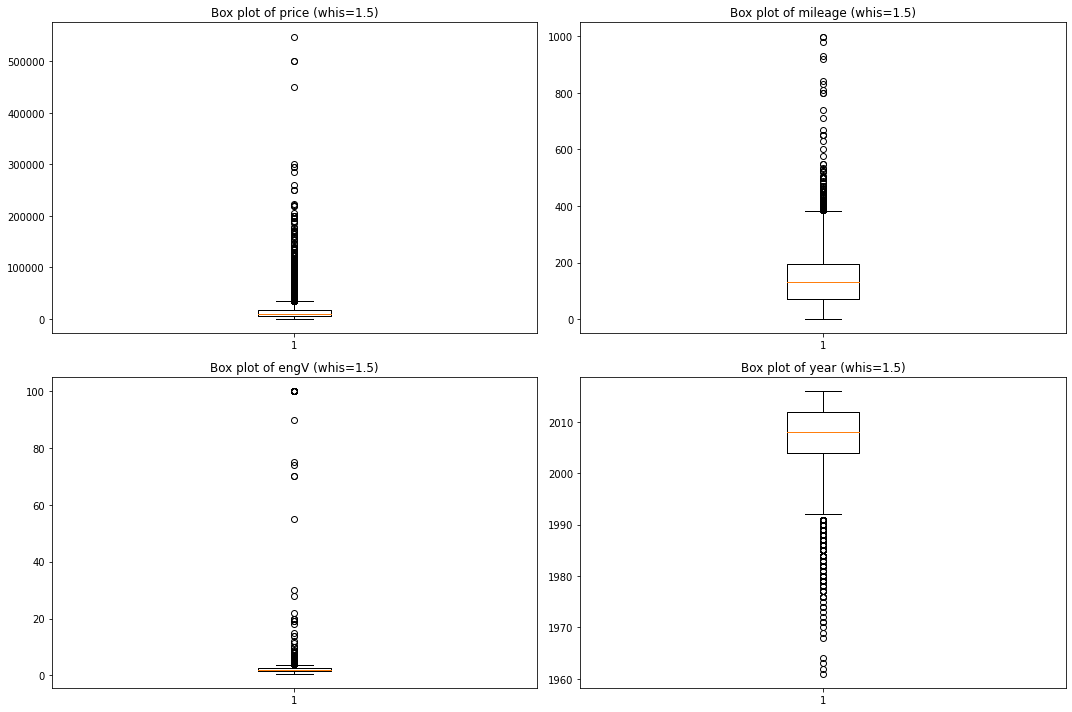

In [ ]:
#checking out outliers
plt.figure(figsize=(15,10))

index = 1

for column in cars_df.select_dtypes(['int64', 'float64']).columns:
  plt.subplot(2,2,index)
  plt.boxplot(cars_df.select_dtypes(['int64', 'float64'])[column])
  plt.title("Box plot of {} (whis=1.5)" .format(column))
  index = index + 1
plt.tight_layout()
plt.show()

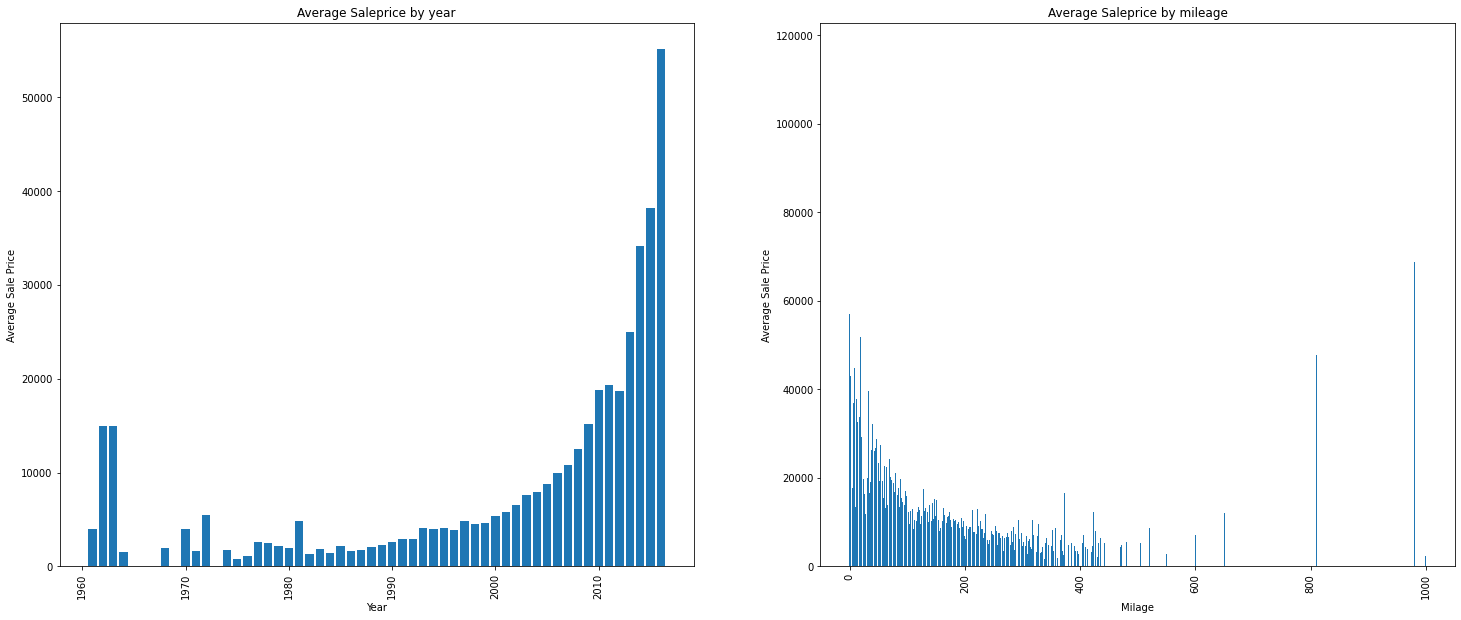

In [ ]:
#plotting average price by year and mileage
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.bar(cars_df.select_dtypes(['int64', 'float64']).groupby('year')['price'].mean().index, cars_df.select_dtypes(['int64', 'float64']).groupby('year')['price'].mean())
plt.title('Average Saleprice by year')
plt.ylabel('Average Sale Price')
plt.xlabel('Year')
plt.xticks(rotation='vertical')


plt.subplot(1,2,2)
plt.bar(cars_df.select_dtypes(['int64', 'float64']).groupby('mileage')['price'].mean().index, cars_df.select_dtypes(['int64', 'float64']).groupby('mileage')['price'].mean())
plt.title('Average Saleprice by mileage')
plt.ylabel('Average Sale Price')
plt.xlabel('Milage')
plt.xticks(rotation='vertical')


plt.show()

Some interesting outliers here. Looks like maybe some classic cars that are old but also relatively expensive. There are also some long haul vehicles that have tons of miles and high sales prices and
some super expensive cars. For the purposes of this model I am going to drop those.

In [ ]:


cars_df = cars_df[cars_df.year >= 1985]
cars_df = cars_df[cars_df.mileage <= 300]
cars_df = cars_df[cars_df.mileage <= 200000]


Let's look at the price variable - this is the target.

(array([7.601e+03, 2.780e+02, 6.600e+01, 2.200e+01, 7.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([     0.,  54780., 109560., 164340., 219120., 273900., 328680.,
        383460., 438240., 493020., 547800.]),
 <a list of 10 Patch objects>)

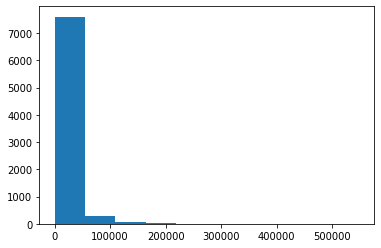

In [ ]:
#exploring the target
plt.hist(cars_df['price'])

The target is very positive skewed - creating a log version of the price to make the distribution more normal. For interperetation, tne results will need to be exponentiated.

In [ ]:

cars_df['log_price'] = np.log(cars_df['price'])

In [ ]:
#dropping the log targets that resolve to infinity
cars_df = cars_df.replace([np.inf, -np.inf], np.nan).dropna(subset = ['log_price'], axis = 0)

(array([  19.,  162.,  668., 1504., 2836., 1588.,  654.,  258.,   55.,
           8.]),
 array([ 5.91485344,  6.64473465,  7.37461586,  8.10449707,  8.83437828,
         9.56425949, 10.2941407 , 11.02402191, 11.75390312, 12.48378433,
        13.21366554]),
 <a list of 10 Patch objects>)

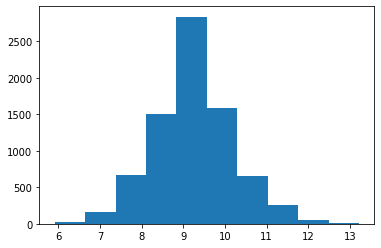

In [ ]:
#target histogram below looks more normal 
plt.hist(cars_df['log_price'])

Now, I will create a correlation matrix for the numeric values to visualize any correlations between the variables and the log transformed target.

Text(0.5, 1.0, 'correlation matrix')

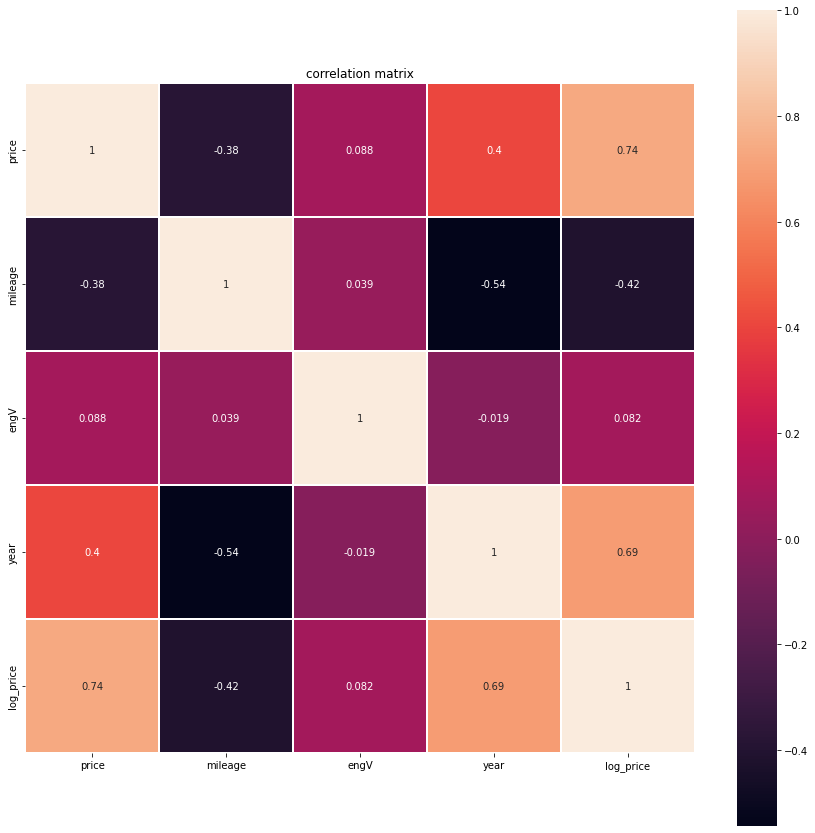

In [ ]:
#checking out the correlation o matrix of the continous variables - year and mileage are the most correlated to the log target
cars_corr = cars_df.corr()

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cars_corr, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")

Year and milage are correlated with the target - they will likely be strong features.

In [ ]:


#exploring the object data types 
obj = cars_df.select_dtypes(['object'])

Let's check out the catagorical variables.

In [ ]:
#getting counts of the unique objects
for objects in obj:
  print('The number of unique catories in {} is: {}' .format(objects, obj[objects].nunique()))

The number of unique catories in car is: 82
The number of unique catories in body is: 6
The number of unique catories in engType is: 3
The number of unique catories in registration is: 2
The number of unique catories in model is: 795
The number of unique catories in drive is: 3


There are a lot of different car models - I will attempt to recatagorize these.

Before I recatagorize the models, checking out the target more - this might help me recatagorize the care models 

In [ ]:

cars = cars_df['price']
cars = pd.DataFrame(cars)
print('The top third of cars cost between {} and {}' .format(np.percentile(cars, 66, axis=0),np.percentile(cars, 100, axis=0 )))
print('The middle third of cars cost between {} and {}' .format(np.percentile(cars, 33, axis=0),np.percentile(cars, 66, axis=0 )))
print('The lowest third of cars cost between {} and {}' .format(np.percentile(cars, 0, axis=0),np.percentile(cars, 33, axis=0 )))

The top third of cars cost between [13900.] and [547800.]
The middle third of cars cost between [7200.] and [13900.]
The lowest third of cars cost between [370.5] and [7200.]


Investigating a specific brand to see how the model pricing is different by model

In [ ]:

ford = cars_df[cars_df['car'] == 'Ford']

In [ ]:
ford.head(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive,log_price
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,9.648595
198,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,9.648595
210,Ford,15500.0,crossover,68,2.5,Diesel,yes,2010,Kuga,front,9.648595
280,Ford,12500.0,sedan,63,1.6,Petrol,yes,2013,Focus,front,9.433484
313,Ford,12099.0,sedan,109,1.6,Gas,yes,2011,Focus,front,9.400878


In [ ]:
#Checking out unique care brands
listed = cars_df.car.unique()

In [ ]:
#Addind unique brands to a list so i can itterate through them below
np.array(listed).tolist()

['Ford',
 'Mercedes-Benz',
 'Nissan',
 'Honda',
 'Renault',
 'BMW',
 'Volkswagen',
 'Audi',
 'Chrysler',
 'Jaguar',
 'Mitsubishi',
 'Kia',
 'Porsche',
 'Toyota',
 'Hyundai',
 'Opel',
 'Chevrolet',
 'Skoda',
 'Land Rover',
 'Daewoo',
 'Mazda',
 'Lexus',
 'Infiniti',
 'Subaru',
 'VAZ',
 'Alfa Romeo',
 'Smart',
 'Peugeot',
 'Suzuki',
 'Chery',
 'Bentley',
 'Volvo',
 'ZAZ',
 'Citroen',
 'Dodge',
 'Fiat',
 'Jeep',
 'SsangYong',
 'Seat',
 'MINI',
 'Dacia',
 'Hummer',
 'Geely',
 'Maserati',
 'BYD',
 'Cadillac',
 'Acura',
 'Aston Martin',
 'Rover',
 'GAZ',
 'GMC',
 'Lincoln',
 'Moskvich-AZLK',
 'FAW',
 'UAZ',
 'TATA',
 'ZX',
 'Lifan',
 'Mercury',
 'Groz',
 'Great Wall',
 'Moskvich-Izh',
 'Saab',
 'Lancia',
 'Aro',
 'Ferrari',
 'Dadi',
 'Rolls-Royce',
 'MG',
 'Samand',
 'JAC',
 'Samsung',
 'Lamborghini',
 'Daihatsu',
 'Hafei',
 'SMA',
 'ËUAZ',
 'Bogdan',
 'Isuzu',
 'Huanghai',
 'Wartburg',
 'Buick']

My goal is to find a way to extract some value from the 'model' variable without having to use all 795 unique models. My plan is to rank each model within each brand of car using engType.

The thinking here is that, in general, within each brand of car, the larger the engine the nicer the model. Some brands will have mostly small engines and some will have mostly large engines but

By looping through each brand and classifying each model within that brand based on how large the engine is, hopefully I can engineer a meaningful feature. 

I will break the models into three classes: 3 for top class, 2 for standard class and 1 for low class

In [ ]:
#creating a list of dictionaries of models zipped to the class by looping through each brand and classifying the models within each brand by the average engV of each model type
master_dict = []
for c in listed:
  df = cars_df[cars_df['car'] == c]
  df = df.groupby(['model'],as_index=False).engV.mean()
  if df.model.count() > 2:
    df.loc[df['engV'] >= np.percentile(df['engV'], 66, axis=0), 'model_class'] = 3.0
    df.loc[df['engV'] < np.percentile(df['engV'], 66, axis=0), 'model_class'] = 2.0
    df.loc[df['engV'] < np.percentile(df['engV'], 33, axis=0), 'model_class'] = 1.0
  elif df.model.count() == 2:
    df.loc[df['engV'] >= np.percentile(df['engV'], 50, axis=0), 'model_class'] = 2.5
    df.loc[df['engV'] < np.percentile(df['engV'], 50, axis=0), 'model_class'] = 1.5
  else: 
    df['model_class'] = 1.5
  class_map = dict(zip(df.model, df.model_class))
  master_dict.append(class_map)
  

In [ ]:
#creating a list of DataFrames for each brand and concating them to one DataFrame 
model_map = []
for dic in master_dict:
  new = pd.DataFrame.from_dict(dic, orient='index')
  model_map.append(new)

df_model_map = pd.concat(model_map)

In [ ]:
df_model_map.head()

,0
B-Max,1.0
C-Max,1.0
Courier,1.0
Escort,2.0
Escort van,1.0


In [ ]:
#creating a dic for mapping to the cars df
class_map2 = dict(zip(df_model_map.index, df_model_map[0]))

In [ ]:
#mapping to the cars df
cars_df['model_class'] = cars_df['model'].map(class_map2)

Let's see if all that worked to add a new feature to the DF.

In [ ]:
cars_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive,log_price,model_class
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,9.648595,3.0
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,9.928180,2.0
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,10.463103,3.0
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,9.786954,1.0
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full,9.717158,2.0


Below I will use a correlation matrix again to see how correlated the new feature is to the target.

Text(0.5, 1.0, 'correlation matrix')

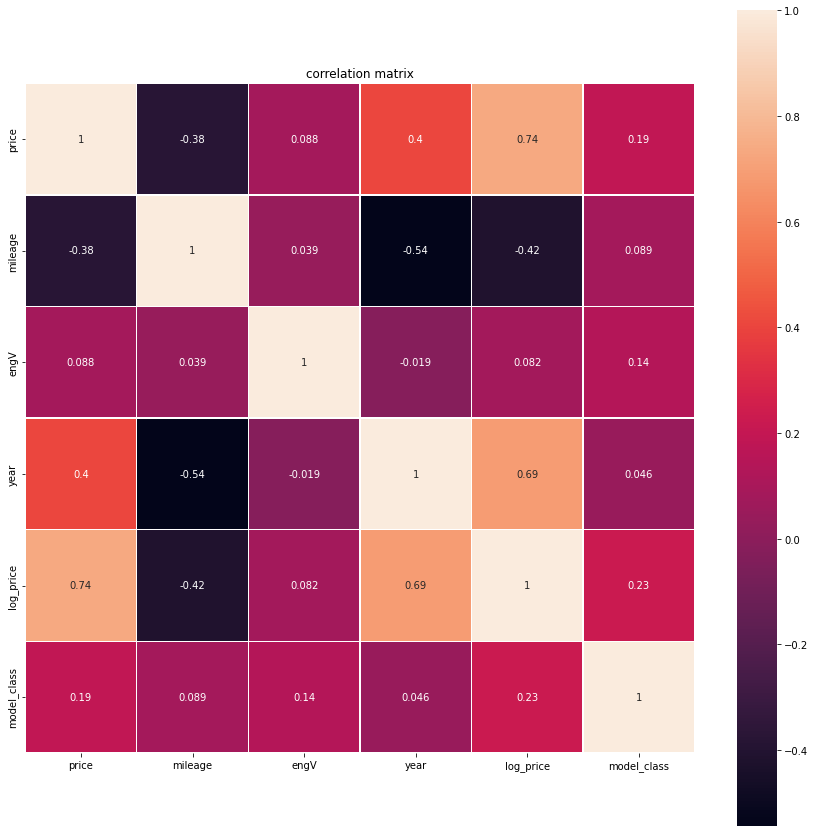

In [ ]:
#the new feature does seem to have a stronger correlation with the target than engV alone.

cars_corr2 = cars_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cars_corr2, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")

In [ ]:
#creating a new dataset for the testing

train = cars_df

In [ ]:
train.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive,log_price,model_class
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,9.648595,3.0
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,9.928180,2.0
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,10.463103,3.0
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,9.786954,1.0
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full,9.717158,2.0


In [ ]:
#I dont need model anymore so I can drop that variable
train = train.drop(['model'], axis = 1)

In [ ]:
#Getting dummies for the other categorical variables
cars = pd.get_dummies(train.car, drop_first=True)

In [ ]:
body = pd.get_dummies(train.body, drop_first=True)
eng = pd.get_dummies(train.engType, drop_first=True)
reg = pd.get_dummies(train.registration, drop_first=True)
drive = pd.get_dummies(train.drive, drop_first=True)

In [ ]:
train = train.join(body)
train = train.join(eng)
train = train.join(reg)
train = train.join(drive)
train = train.join(cars)

train = train.drop(['car', 'body', 'engType', 'registration', 'drive'], axis = 1)

In [ ]:
train.head()

,price,mileage,engV,year,log_price,model_class,hatch,other,sedan,vagon,van,Gas,Petrol,yes,full,rear,Alfa Romeo,Aro,Aston Martin,Audi,BMW,BYD,Bentley,Bogdan,Buick,Cadillac,Chery,Chevrolet,Chrysler,Citroen,Dacia,Dadi,Daewoo,Daihatsu,Dodge,FAW,Ferrari,Fiat,Ford,GAZ,...,Land Rover,Lexus,Lifan,Lincoln,MG,MINI,Maserati,Mazda,Mercedes-Benz,Mercury,Mitsubishi,Moskvich-AZLK,Moskvich-Izh,Nissan,Opel,Peugeot,Porsche,Renault,Rolls-Royce,Rover,SMA,Saab,Samand,Samsung,Seat,Skoda,Smart,SsangYong,Subaru,Suzuki,TATA,Toyota,UAZ,VAZ,Volkswagen,Volvo,Wartburg,ZAZ,ZX,ËUAZ
0,15500.0,68,2.5,2010,9.648595,3.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20500.0,173,1.8,2011,9.928180,2.0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35000.0,135,5.5,2008,10.463103,3.0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,17800.0,162,1.8,2012,9.786954,1.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,16600.0,83,2.0,2013,9.717158,2.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


At this point, the DF looks good to. I am ready to start training some models.

In [ ]:
#setting up some lists for comparing the models

cv_mean = []
cv_variance = []

mae = []
mse_l = []
rmse_l = []
mape = []

#regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

X = train.drop(['price', 'log_price'], axis=1)
y = cars_df['log_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit an OLS model using scikit-learn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


y_preds_test = lrm.predict(X_test)

from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse


cross_va_lrm = cross_val_score(lrm, X_train, y_train, cv=10)

cv_mean_lrm = cross_va_lrm.mean()
cv_variance_lrm  = cross_va_lrm.var()
mae_lrm = mean_absolute_error(y_test, y_preds_test)
mse_lrm  = mse(y_test, y_preds_test)
rmse_lrm  = rmse(y_test, y_preds_test)
mape_lrm  = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

cv_mean.append(cv_mean_lrm)
cv_variance.append(cv_variance_lrm)

mae.append(mae_lrm)
mse_l.append(mse_lrm)
rmse_l.append(rmse_lrm)
mape.append(mape_lrm)

print('Cross-Validation: {} \n' .format(cross_va_lrm))
print('Cross-Validation mean: {} \n' .format(cv_mean_lrm))
print('Cross-Validation variance: {}\n' .format(cv_variance_lrm))

print("-----Test set statistics-----")

print("Mean absolute error of the prediction is: {}".format(mae_lrm))
print("Mean squared error of the prediction is: {}".format(mse_lrm))
print("Root mean squared error of the prediction is: {}".format(rmse_lrm))
print("Mean absolute percentage error of the prediction is: {}".format(mape_lrm))

Cross-Validation: [0.8924473  0.8932529  0.88801206 0.89146541 0.91112481 0.8929563
 0.88550207 0.88906463 0.88549414 0.89165452] 

Cross-Validation mean: 0.8920974134379829 

Cross-Validation variance: 4.778223095604942e-05

-----Test set statistics-----
Mean absolute error of the prediction is: 0.2222571320976375
Mean squared error of the prediction is: 0.09273852231369356
Root mean squared error of the prediction is: 0.3045300023211072
Mean absolute percentage error of the prediction is: 2.4156116359116964


In [ ]:
#Ridge
from sklearn.linear_model import RidgeCV

alphas = [10.0 ** p for p in np.arange(-10,40,1)]

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)


y_preds_test = ridge_cv.predict(X_test)

cross_va_ridge_cv = cross_val_score(ridge_cv, X_train, y_train, cv=10)

cv_mean_ridge_cv = cross_va_ridge_cv.mean()
cv_variance_ridge_cv  = cross_va_ridge_cv.var()
mae_ridge_cv = mean_absolute_error(y_test, y_preds_test)
mse_ridge_cv  = mse(y_test, y_preds_test)
rmse_ridge_cv  = rmse(y_test, y_preds_test)
mape_ridge_cv  = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

cv_mean.append(cv_mean_ridge_cv)
cv_variance.append(cv_variance_ridge_cv)
mae.append(mae_ridge_cv)
mse_l.append(mse_ridge_cv)
rmse_l.append(rmse_ridge_cv)
mape.append(mape_ridge_cv)

print('Cross-Validation: {} \n' .format(cross_va_ridge_cv))
print('Cross-Validation mean: {} \n' .format(cv_mean_ridge_cv))
print('Cross-Validation variance: {}\n' .format(cv_variance_ridge_cv))

print("-----Test set statistics-----")

print("Mean absolute error of the prediction is: {}".format(mae_ridge_cv))
print("Mean squared error of the prediction is: {}".format(mse_ridge_cv))
print("Root mean squared error of the prediction is: {}".format(rmse_ridge_cv))
print("Mean absolute percentage error of the prediction is: {}".format(mape_ridge_cv))

Cross-Validation: [0.8924473  0.8932529  0.88801206 0.89077332 0.91112481 0.89272797
 0.88437238 0.88942048 0.88664403 0.8918755 ] 

Cross-Validation mean: 0.8920650759203739 

Cross-Validation variance: 4.789604916502656e-05

-----Test set statistics-----
Mean absolute error of the prediction is: 0.22225713209736903
Mean squared error of the prediction is: 0.09273852231333136
Root mean squared error of the prediction is: 0.3045300023205125
Mean absolute percentage error of the prediction is: 2.415611635908824


In [ ]:
#Lasso
from sklearn.linear_model import LassoCV

X = train.drop(['price', 'log_price'], axis=1)
y = cars_df['log_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)



y_preds_test = lasso_cv.predict(X_test)

cross_va_lasso_cv = cross_val_score(lasso_cv, X_train, y_train, cv=10)

cv_mean_lasso_cv = cross_va_lasso_cv.mean()
cv_variance_lasso_cv  = cross_va_lasso_cv.var()
mae_lasso_cv = mean_absolute_error(y_test, y_preds_test)
mse_lasso_cv  = mse(y_test, y_preds_test)
rmse_lasso_cv  = rmse(y_test, y_preds_test)
mape_lasso_cv  = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

cv_mean.append(cv_mean_lasso_cv)
cv_variance.append(cv_variance_lasso_cv)
mae.append(mae_lasso_cv)
mse_l.append(mse_lasso_cv)
rmse_l.append(rmse_lasso_cv)
mape.append(mape_lasso_cv)

print('Cross-Validation: {} \n' .format(cross_va_lasso_cv))
print('Cross-Validation mean: {} \n' .format(cv_mean_lasso_cv))
print('Cross-Validation variance: {}\n' .format(cv_variance_lasso_cv))

print("-----Test set statistics-----")

print("Mean absolute error of the prediction is: {}".format(mae_lasso_cv))
print("Mean squared error of the prediction is: {}".format(mse_lasso_cv))
print("Root mean squared error of the prediction is: {}".format(rmse_lasso_cv))
print("Mean absolute percentage error of the prediction is: {}".format(mape_lasso_cv))

Cross-Validation: [0.89244842 0.89326433 0.88804453 0.89025784 0.91113525 0.89293295
 0.88522177 0.88910088 0.88557059 0.8920654 ] 

Cross-Validation mean: 0.8920041965252178 

Cross-Validation variance: 4.831995400558061e-05

-----Test set statistics-----
Mean absolute error of the prediction is: 0.22224455136460164
Mean squared error of the prediction is: 0.09272793151507451
Root mean squared error of the prediction is: 0.304512613064015
Mean absolute percentage error of the prediction is: 2.415469804406782


In [ ]:
#Elastic
from sklearn.linear_model import ElasticNetCV

X = train.drop(['price', 'log_price'], axis=1)
y = cars_df['log_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here

y_preds_test = elasticnet_cv.predict(X_test)

cross_va_elasticnet_cv = cross_val_score(elasticnet_cv, X_train, y_train, cv=10)

cv_mean_elasticnet_cv = cross_va_elasticnet_cv.mean()
cv_variance_elasticnet_cv  = cross_va_elasticnet_cv.var()
mae_elasticnet_cv = mean_absolute_error(y_test, y_preds_test)
mse_elasticnet_cv  = mse(y_test, y_preds_test)
rmse_elasticnet_cv  = rmse(y_test, y_preds_test)
mape_elasticnet_cv  = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

cv_mean.append(cv_mean_elasticnet_cv)
cv_variance.append(cv_variance_elasticnet_cv)
mae.append(mae_elasticnet_cv)
mse_l.append(mse_elasticnet_cv)
rmse_l.append(rmse_elasticnet_cv)
mape.append(mape_elasticnet_cv)

print('Cross-Validation: {} \n' .format(cross_va_elasticnet_cv))
print('Cross-Validation mean: {} \n' .format(cv_mean_elasticnet_cv))
print('Cross-Validation variance: {}\n' .format(cv_variance_elasticnet_cv))

print("-----Test set statistics-----")

print("Mean absolute error of the prediction is: {}".format(mae_elasticnet_cv))
print("Mean squared error of the prediction is: {}".format(mse_elasticnet_cv))
print("Root mean squared error of the prediction is: {}".format(rmse_elasticnet_cv))
print("Mean absolute percentage error of the prediction is: {}".format(mape_elasticnet_cv))


Cross-Validation: [0.89244842 0.89326433 0.88804453 0.89068981 0.91113525 0.89268211
 0.88525877 0.88946328 0.88557059 0.89192775] 

Cross-Validation mean: 0.8920484839747369 

Cross-Validation variance: 4.789834739714185e-05

-----Test set statistics-----
Mean absolute error of the prediction is: 0.22224455160425585
Mean squared error of the prediction is: 0.0927279317205302
Root mean squared error of the prediction is: 0.3045126134013667
Mean absolute percentage error of the prediction is: 2.4154698073618506


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X = train.drop(['price', 'log_price'], axis=1)
y = cars_df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

y_preds_test = regr.predict(X_test)

cross_va_regr = cross_val_score(regr, X_train, y_train, cv=10)

cv_mean_regr = cross_va_regr.mean()
cv_variance_regr  = cross_va_regr.var()
mae_regr = mean_absolute_error(y_test, y_preds_test)
mse_regr  = mse(y_test, y_preds_test)
rmse_regr  = rmse(y_test, y_preds_test)
mape_regr  = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

cv_mean.append(cv_mean_regr)
cv_variance.append(cv_variance_regr)
mae.append(mae_regr)
mse_l.append(mse_regr)
rmse_l.append(rmse_regr)
mape.append(mape_regr)

print('Cross-Validation: {} \n' .format(cross_va_regr))
print('Cross-Validation mean: {} \n' .format(cv_mean_regr))
print('Cross-Validation variance: {}\n' .format(cv_variance_regr))

print("-----Test set statistics-----")

print("Mean absolute error of the prediction is: {}".format(mae_regr))
print("Mean squared error of the prediction is: {}".format(mse_regr))
print("Root mean squared error of the prediction is: {}".format(rmse_regr))
print("Mean absolute percentage error of the prediction is: {}".format(mape_regr))



Cross-Validation: [0.91782491 0.91504623 0.87365377 0.91447299 0.92828685 0.92075883
 0.89981951 0.90550653 0.91782757 0.8859044 ] 

Cross-Validation mean: 0.9079101594147747 

Cross-Validation variance: 0.0002599938987624508

-----Test set statistics-----
Mean absolute error of the prediction is: 0.18965071711971038
Mean squared error of the prediction is: 0.07480432957607733
Root mean squared error of the prediction is: 0.27350380175799627
Mean absolute percentage error of the prediction is: 2.0891614039235784


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


X = train.drop(['price', 'log_price'], axis=1)
y = cars_df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
reg.fit(X_train, y_train)

y_preds_test = reg.predict(X_test)

cross_va_reg = cross_val_score(reg, X_train, y_train, cv=10)

cv_mean_reg = cross_va_reg.mean()
cv_variance_reg  = cross_va_reg.var()
mae_reg = mean_absolute_error(y_test, y_preds_test)
mse_reg  = mse(y_test, y_preds_test)
rmse_reg  = rmse(y_test, y_preds_test)
mape_reg  = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

cv_mean.append(cv_mean_reg)
cv_variance.append(cv_variance_reg)
mae.append(mae_reg)
mse_l.append(mse_reg)
rmse_l.append(rmse_reg)
mape.append(mape_reg)

print('Cross-Validation: {} \n' .format(cross_va_reg))
print('Cross-Validation mean: {} \n' .format(cv_mean_reg))
print('Cross-Validation variance: {}\n' .format(cv_variance_reg))

print("-----Test set statistics-----")

print("Mean absolute error of the prediction is: {}".format(mae_reg))
print("Mean squared error of the prediction is: {}".format(mse_reg))
print("Root mean squared error of the prediction is: {}".format(rmse_reg))
print("Mean absolute percentage error of the prediction is: {}".format(mape_reg))


Cross-Validation: [0.91515201 0.91107772 0.89016385 0.92218488 0.91605955 0.9142938
 0.90076295 0.91068607 0.91026827 0.91422479] 

Cross-Validation mean: 0.9104873896622759 

Cross-Validation variance: 7.261427005816509e-05

-----Test set statistics-----
Mean absolute error of the prediction is: 0.20319474971866852
Mean squared error of the prediction is: 0.07812369031146268
Root mean squared error of the prediction is: 0.27950615433557574
Mean absolute percentage error of the prediction is: 2.230355014876989


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler




X = train.drop(['price', 'log_price'], axis=1)
y = cars_df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rfr.fit(X_train, y_train)

y_preds_test = rfr.predict(X_test)

cross_va_rfr = cross_val_score(rfr, X_train, y_train, cv=10)

cv_mean_rfr = cross_va_rfr.mean()
cv_variance_rfr  = cross_va_rfr.var()
mae_rfr = mean_absolute_error(y_test, y_preds_test)
mse_rfr  = mse(y_test, y_preds_test)
rmse_rfr  = rmse(y_test, y_preds_test)
mape_rfr  = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

cv_mean.append(cv_mean_rfr)
cv_variance.append(cv_variance_rfr)
mae.append(mae_rfr)
mse_l.append(mse_rfr)
rmse_l.append(rmse_rfr)
mape.append(mape_rfr)

print('Cross-Validation: {} \n' .format(cross_va_rfr))
print('Cross-Validation mean: {} \n' .format(cv_mean_rfr))
print('Cross-Validation variance: {}\n' .format(cv_variance_rfr))

print("-----Test set statistics-----")

print("Mean absolute error of the prediction is: {}".format(mae_rfr))
print("Mean squared error of the prediction is: {}".format(mse_rfr))
print("Root mean squared error of the prediction is: {}".format(rmse_rfr))
print("Mean absolute percentage error of the prediction is: {}".format(mape_rfr))


Cross-Validation: [0.93366257 0.92760574 0.91250881 0.93411277 0.93632009 0.93161898
 0.92241846 0.92428587 0.93819615 0.93254799] 

Cross-Validation mean: 0.929327743419624 

Cross-Validation variance: 5.438490274817748e-05

-----Test set statistics-----
Mean absolute error of the prediction is: 0.1681962011155802
Mean squared error of the prediction is: 0.06309087706088717
Root mean squared error of the prediction is: 0.25117897416162677
Mean absolute percentage error of the prediction is: 1.8751731669800678


In [ ]:
#comparing the results

col={'cv_mean':cv_mean,'cv_variance':cv_variance,'mae':mae,'mse':mse_l,'rmse':rmse_l,'mape':mape}
models=['OLS','Ridge','Lasso','Elastic','SVR Regression', 'Gradient Boost Regression', 'RF Regression']
results_comp= pd.DataFrame(data=col,index=models)
results_comp

,cv_mean,cv_variance,mae,mse,rmse,mape
OLS,0.892097,0.000048,0.222257,0.092739,0.304530,2.415612
Ridge,0.892065,0.000048,0.222257,0.092739,0.304530,2.415612
Lasso,0.892004,0.000048,0.222245,0.092728,0.304513,2.415470
Elastic,0.892048,0.000048,0.222245,0.092728,0.304513,2.415470
SVR Regression,0.907910,0.000260,0.189651,0.074804,0.273504,2.089161
Gradient Boost Regression,0.910487,0.000073,0.203195,0.078124,0.279506,2.230355
RF Regression,0.929328,0.000054,0.168196,0.063091,0.251179,1.875173


I am selecting the RF model because it has the highest cross-val mean, a fairly low varianc and low mape

Limiting to 20 features with min_samples_split at 4 seems, and 150 estimators to give a high cross val score

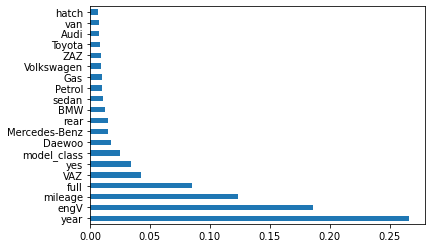

In [ ]:

feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

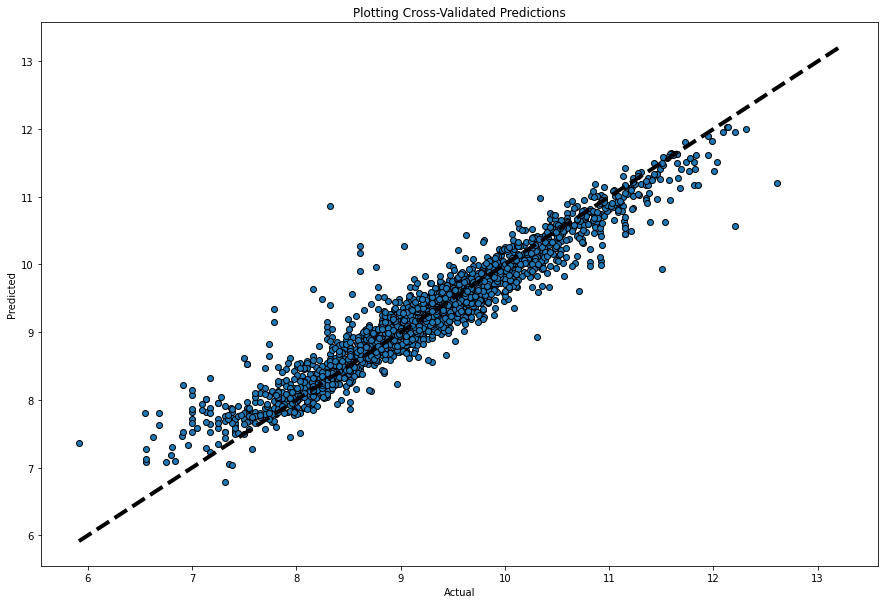

In [ ]:
from sklearn.model_selection import cross_val_predict
#plotting my predictions against actuals 

predicted = cross_val_predict(rfr, X_test, y_test, cv=10)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Plotting Cross-Validated Predictions')
plt.show()



Looks like the predictions are a little high for lower prices and a little low for the higher prices 

In [ ]:
#Actuals vs. predictions
y_predict_test = rfr.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_predict_test})
df

,Actual,Predicted
5246,8.974618,8.940796
1200,9.388487,9.505914
9326,9.047821,9.023429
5926,8.648221,8.641295
2491,9.532424,9.530532
...,...,...
5110,8.922658,9.262266
7185,8.516993,8.943877
4660,8.318742,8.554898
3868,8.961879,8.878196


In [ ]:
#calc'ing MAE in actual dollars
#MAE = 1/𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

df['exp_actual'] = np.exp(df['Actual'])
df['exp_predict'] = np.exp(df['Predicted'])
df['abs_diff'] = abs(df['exp_actual'] - df['exp_predict'])
df
                     

,Actual,Predicted,exp_actual,exp_predict,abs_diff
5246,8.974618,8.940796,7900.0,7637.277517,262.722483
1200,9.388487,9.505914,11950.0,13438.976629,1488.976629
9326,9.047821,9.023429,8500.0,8295.169269,204.830731
5926,8.648221,8.641295,5700.0,5660.654701,39.345299
2491,9.532424,9.530532,13800.0,13773.913629,26.086371
...,...,...,...,...,...
5110,8.922658,9.262266,7500.0,10532.979271,3032.979271
7185,8.516993,8.943877,4999.0,7660.840893,2661.840893
4660,8.318742,8.554898,4100.0,5192.123615,1092.123615
3868,8.961879,8.878196,7800.0,7173.839173,626.160827


In [ ]:
m_a_e = 1/2326 * df.abs_diff.sum()

In [ ]:
m_a_e

2791.2814868681544

In [ ]:
mean_absolute_error(df['exp_actual'], df['exp_predict'])

2791.2814868681544